<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business Problem</a></span></li><li><span><a href="#Introduction-to-Pycaret" data-toc-modified-id="Introduction-to-Pycaret-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introduction to Pycaret</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Functions" data-toc-modified-id="Useful-Functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Useful Functions</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Train-test-split-with-stratify" data-toc-modified-id="Train-test-split-with-stratify-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train test split with stratify</a></span></li><li><span><a href="#Pycaret-Setup" data-toc-modified-id="Pycaret-Setup-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Pycaret Setup</a></span></li><li><span><a href="#Comparing-All-Models" data-toc-modified-id="Comparing-All-Models-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Comparing All Models</a></span></li><li><span><a href="#Create-Models" data-toc-modified-id="Create-Models-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Create Models</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Further-tuning" data-toc-modified-id="Further-tuning-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Further tuning</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Ensemble--Modelling" data-toc-modified-id="Ensemble--Modelling-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Ensemble  Modelling</a></span><ul class="toc-item"><li><span><a href="#Bagging" data-toc-modified-id="Bagging-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Bagging</a></span></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-14.2"><span class="toc-item-num">14.2&nbsp;&nbsp;</span>Boosting</a></span></li><li><span><a href="#Blending" data-toc-modified-id="Blending-14.3"><span class="toc-item-num">14.3&nbsp;&nbsp;</span>Blending</a></span></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-14.4"><span class="toc-item-num">14.4&nbsp;&nbsp;</span>Stacking</a></span></li></ul></li><li><span><a href="#Model-Calibration" data-toc-modified-id="Model-Calibration-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Model Calibration</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Model Interpretation</a></span></li><li><span><a href="#Model-Predictions" data-toc-modified-id="Model-Predictions-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Model Predictions</a></span></li><li><span><a href="#Model-Persistence" data-toc-modified-id="Model-Persistence-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Model Persistence</a></span></li><li><span><a href="#Time-taken" data-toc-modified-id="Time-taken-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Time taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Data Description

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

```
Dependent features: 1 (price)
Features : 19 home features
Id: 1 house ID
Task: Try to estimate the price based on given features.
```

# Business Problem

<div class="alert alert-block alert-success">
<b>Business Problem:</b>  <br>
Task &nbsp;&nbsp; : Predict the house price based on King County Seattle House price data. <br>
Metric : RMSE <br>
General Model: SVR, Ridge, Random Forest <br>
Boosting: Gradient Boosting, xgb, lgb
Tools: Stakcing multiple regressors to train and blending them to predit<br>
Question: What is the price of new house?
</div>

# Imports

In [0]:
import time

time_start_notebook = time.time()

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from pathlib import Path

from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') 

# random state
SEED=100

home = os.path.expanduser('~')

[(x.__name__,x.__version__) for x in [np,pd,sns,sklearn]]

[('numpy', '1.18.4'),
 ('pandas', '1.0.4'),
 ('seaborn', '0.10.1'),
 ('sklearn', '0.22.2.post1')]

In [0]:
# Models
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor,
                              AdaBoostRegressor,
                              BaggingRegressor)

In [0]:
# Stacking
from mlxtend.regressor import StackingCVRegressor

In [0]:
# Boosting
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [0]:
# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [0]:
# Model Training
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [8]:
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    print('Environment: Google Colab')

Environment: Google Colab


# Load the data

In [9]:
ifile = 'https://github.com/bhishanpdl/Datasets/blob/master/King_County_Seattle_House_Price_Kaggle/processed/data_cleaned_encoded.csv?raw=true'
df = pd.read_csv(ifile)
print(df.shape)
df.head()

(21613, 92)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_top10,zipcode_houses,basement_bool,renovation_bool,age_cat,age_after_renovation_cat,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,...,grade_7,grade_8,grade_9,zipcode_top10_98004,zipcode_top10_98006,zipcode_top10_98033,zipcode_top10_98039,zipcode_top10_98040,zipcode_top10_98102,zipcode_top10_98105,zipcode_top10_98155,zipcode_top10_98177,zipcode_top10_others,age_cat_0,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_7,age_cat_8,age_cat_9,age_after_renovation_cat_0,age_after_renovation_cat_1,age_after_renovation_cat_2,age_after_renovation_cat_3,age_after_renovation_cat_4,age_after_renovation_cat_5,age_after_renovation_cat_6,age_after_renovation_cat_7,age_after_renovation_cat_8,age_after_renovation_cat_9,log1p_price,log1p_sqft_living,log1p_sqft_lot,log1p_sqft_above,log1p_sqft_basement,log1p_sqft_living15,log1p_sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,1955,59,others,262,0,0,5,5,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12.309987,7.074117,8.639588,7.074117,0.000000,7.201171,8.639588
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,1991,23,others,410,1,1,5,2,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13.195616,7.852050,8.887791,7.682943,5.993961,7.433075,8.941153
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,1933,82,others,283,0,0,7,7,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,12.100718,6.647688,9.210440,6.647688,0.000000,7.908755,8.995041
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,1965,49,others,263,1,0,4,4,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13.311331,7.581210,8.517393,6.957497,6.814543,7.215975,8.517393
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,1987,28,others,441,0,0,2,2,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13.142168,7.427144,8.997271,7.427144,0.000000,7.496097,8.923191


In [0]:
#ifile = Path.home() / 'Datasets/king_county_house_price/kc_house_price.csv'
#df = pd.read_csv(ifile)
#print(df.shape)
#df.head()

# Data Processing

In [11]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_top10,zipcode_houses,basement_bool,renovation_bool,age_cat,age_after_renovation_cat,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,...,grade_7,grade_8,grade_9,zipcode_top10_98004,zipcode_top10_98006,zipcode_top10_98033,zipcode_top10_98039,zipcode_top10_98040,zipcode_top10_98102,zipcode_top10_98105,zipcode_top10_98155,zipcode_top10_98177,zipcode_top10_others,age_cat_0,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_7,age_cat_8,age_cat_9,age_after_renovation_cat_0,age_after_renovation_cat_1,age_after_renovation_cat_2,age_after_renovation_cat_3,age_after_renovation_cat_4,age_after_renovation_cat_5,age_after_renovation_cat_6,age_after_renovation_cat_7,age_after_renovation_cat_8,age_after_renovation_cat_9,log1p_price,log1p_sqft_living,log1p_sqft_lot,log1p_sqft_above,log1p_sqft_basement,log1p_sqft_living15,log1p_sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,1955,59,others,262,0,0,5,5,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12.309987,7.074117,8.639588,7.074117,0.000000,7.201171,8.639588
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,1991,23,others,410,1,1,5,2,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13.195616,7.852050,8.887791,7.682943,5.993961,7.433075,8.941153


In [12]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sales', 'age',
       'yr_renovated2', 'age_after_renovation', 'zipcode_top10',
       'zipcode_houses', 'basement_bool', 'renovation_bool', 'age_cat',
       'age_after_renovation_cat', 'waterfront_0', 'waterfront_1', 'view_0',
       'view_1', 'view_2', 'view_3', 'view_4', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_1', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'zipcode_top10_98004',
       'zipcode_top10_98006', 'zipcode_top10_98033', 'zipcode_top10_98039',
       'zipcode_top10_98040', 'zipcode_top10_98102', 'zipcode_top10_98105',
       'zipcode_top10_98155', 'zipcode_t

In [0]:
cols_sq = ['bedrooms',
            'bathrooms',
            'floors',
            'waterfront',
            'view',
            'age',
            'age_after_renovation',
            'log1p_sqft_living',
            'log1p_sqft_lot',
            'log1p_sqft_above',
            'log1p_sqft_basement',
            'log1p_sqft_living15',
            'log1p_sqft_lot15']

In [0]:
for col in cols_sq:
    df[col + '_sq'] = df[col]**2

In [15]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view',
       ...
       'waterfront_sq', 'view_sq', 'age_sq', 'age_after_renovation_sq',
       'log1p_sqft_living_sq', 'log1p_sqft_lot_sq', 'log1p_sqft_above_sq',
       'log1p_sqft_basement_sq', 'log1p_sqft_living15_sq',
       'log1p_sqft_lot15_sq'],
      dtype='object', length=105)


In [16]:
exclude = ['id', 'date', 'price','zipcode_top10']
features = [i for i in df.columns
            if i not in exclude]
target = 'price'

df[features].head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_houses,basement_bool,renovation_bool,age_cat,age_after_renovation_cat,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_1,...,age_cat_0,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_7,age_cat_8,age_cat_9,age_after_renovation_cat_0,age_after_renovation_cat_1,age_after_renovation_cat_2,age_after_renovation_cat_3,age_after_renovation_cat_4,age_after_renovation_cat_5,age_after_renovation_cat_6,age_after_renovation_cat_7,age_after_renovation_cat_8,age_after_renovation_cat_9,log1p_price,log1p_sqft_living,log1p_sqft_lot,log1p_sqft_above,log1p_sqft_basement,log1p_sqft_living15,log1p_sqft_lot15,bedrooms_sq,bathrooms_sq,floors_sq,waterfront_sq,view_sq,age_sq,age_after_renovation_sq,log1p_sqft_living_sq,log1p_sqft_lot_sq,log1p_sqft_above_sq,log1p_sqft_basement_sq,log1p_sqft_living15_sq,log1p_sqft_lot15_sq
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,1955,59,262,0,0,5,5,1,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12.309987,7.074117,8.639588,7.074117,0.000000,7.201171,8.639588,9,1.0000,1.0,0,0,3481,3481,50.043129,74.642477,50.043129,0.000000,51.856862,74.642477
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,1991,23,410,1,1,5,2,1,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13.195616,7.852050,8.887791,7.682943,5.993961,7.433075,8.941153,9,5.0625,4.0,0,0,3969,529,61.654692,78.992825,59.027616,35.927574,55.250609,79.944215


In [17]:
# make sure all features are numeric
df[features].select_dtypes('object').shape

(21613, 0)

In [18]:
# make sure there are no Nans
df[features].isna().sum().sum()

0

# Train test split

In [56]:
from sklearn.model_selection import train_test_split

df_Xtrain, df_Xtest, ser_ytrain, ser_ytest = train_test_split(
    df[features], df[target],
    test_size=0.2, random_state=SEED, 
    )

ytrain = np.array(ser_ytrain).ravel()
ytest = np.array(ser_ytest).ravel()
print(df_Xtrain.shape,ser_ytrain.shape)
df_Xtrain.head()

(17290, 101) (17290,)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_houses,basement_bool,renovation_bool,age_cat,age_after_renovation_cat,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_1,...,age_cat_0,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_7,age_cat_8,age_cat_9,age_after_renovation_cat_0,age_after_renovation_cat_1,age_after_renovation_cat_2,age_after_renovation_cat_3,age_after_renovation_cat_4,age_after_renovation_cat_5,age_after_renovation_cat_6,age_after_renovation_cat_7,age_after_renovation_cat_8,age_after_renovation_cat_9,log1p_price,log1p_sqft_living,log1p_sqft_lot,log1p_sqft_above,log1p_sqft_basement,log1p_sqft_living15,log1p_sqft_lot15,bedrooms_sq,bathrooms_sq,floors_sq,waterfront_sq,view_sq,age_sq,age_after_renovation_sq,log1p_sqft_living_sq,log1p_sqft_lot_sq,log1p_sqft_above_sq,log1p_sqft_basement_sq,log1p_sqft_living15_sq,log1p_sqft_lot15_sq
16000,3,1.75,1780,11096,1.0,0,0,3,7,1210,570,1979,0,98074,47.6170,-122.051,1780,10640,2014,35,1979,35,441,1,0,3,3,1,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12.691584,7.484930,9.314430,7.099202,6.347389,7.484930,9.272470,9,3.0625,1.00,0,0,1225,1225,56.024181,86.758608,50.398665,40.289350,56.024181,85.978695
11286,2,2.50,1420,2229,2.0,0,0,3,7,1420,0,2004,0,98059,47.4871,-122.165,1500,2230,2014,10,2004,10,468,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12.535380,7.259116,7.709757,7.259116,0.000000,7.313887,7.710205,4,6.2500,4.00,0,0,100,100,52.694767,59.440351,52.694767,0.000000,53.492941,59.447264
3201,2,1.00,1790,4000,1.0,0,0,4,7,1040,750,1923,0,98112,47.6405,-122.301,1310,4000,2014,91,1923,91,269,1,0,7,7,1,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,13.473022,7.490529,8.294300,6.947937,6.621406,7.178545,8.294300,4,1.0000,1.00,0,0,8281,8281,56.108031,68.795406,48.273830,43.843013,51.531515,68.795406
11049,4,1.00,1710,117176,1.5,0,0,4,6,1710,0,1942,0,98055,47.4497,-122.212,1940,12223,2014,72,1942,72,268,0,0,6,6,1,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,12.873648,7.444833,11.671441,7.444833,0.000000,7.570959,9.411157,16,1.0000,2.25,0,0,5184,5184,55.425542,136.222532,55.425542,0.000000,57.319414,88.569867
9716,4,1.00,1150,5217,1.5,0,0,3,7,1150,0,1951,0,98115,47.6806,-122.287,1220,5217,2015,64,1951,64,583,0,0,5,5,1,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13.100120,7.048386,8.559869,7.048386,0.000000,7.107425,8.559869,16,1.0000,2.25,0,0,4096,4096,49.679751,73.271365,49.679751,0.000000,50.515497,73.271365


# Modelling

## Setup Models

In [0]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [0]:
# Setup cross validation folds
kf = KFold(n_splits=5, random_state=SEED, shuffle=True)

In [0]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2,
                1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                max_depth=15,
                min_samples_split=5,
                min_samples_leaf=5,
                max_features=None,
                oob_score=True,
                n_jobs=-1,
                random_state=SEED)



In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(alpha=0.5, criterion='friedman_mse', init=None,
                          learning_rate=0.030436296469075703, loss='quantile',
                          max_depth=None, max_features=0.8340107985008011,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=3,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=245, n_iter_no_change=None,
                          presort='auto', random_state=3,
                          subsample=0.5131351702909814, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# XGBoost Regressor
xgboost = XGBRegressor(n_jobs=-1, random_state=SEED,
                        objective='reg:squarederror',
                        n_estimators=1200,
                        max_depth=3,
                        reg_alpha=1,
                        reg_lambda=5,
                        subsample=1,
                        gamma=0,
                        min_child_weight=1,
                        colsample_bytree=1,
                        learning_rate=0.1
                        )

# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=100, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
# Stack up all the models
from mlxtend.regressor import StackingCVRegressor
stack = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

## Cross validation scores

In [0]:
def get_cv_rmse(model_name, model,
                X=df_Xtrain,y=ser_ytrain,
                cv=kf,df_scores=None,show=True):
    time_start = time.time()
    # output df
    if not isinstance(df_scores,pd.DataFrame):
        df_scores = pd.DataFrame({'Model': [],
                                'RMSE':[],
                                'rmse_std': []})
        
    # get score from cross-validation
    score = np.sqrt(-cross_val_score(model, X,y,
            scoring="neg_mean_squared_error",cv=cv))
    df_scores.loc[len(df_scores)] = [model_name, score.mean(), score.std()]
    df_scores = df_scores.sort_values('RMSE',ascending=True)
    df_scores = df_scores.drop_duplicates()
    df_scores = df_scores.reset_index(drop=True)

    # time taken
    time_taken = time.time() - time_start
    h,m = divmod(time_taken,60*60)
    print('Time taken : {:.0f} hr '\
        '{:.0f} min {:.0f} secs\n'.format(h, *divmod(m,60)))
    
    # display output
    if show:
        display(df_scores.style.format({'RMSE': "{:,.0f}",'rmse_std': "{:,.0f}"}))

    return df_scores

In [26]:
df_scores = get_cv_rmse('ridge', ridge,df_scores=None)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.275e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.90202e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.7583e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.30796e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.21627e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWa

Time taken : 0 hr 0 min 20 secs



,Model,RMSE,rmse_std
0,ridge,"113,787","9,183"


In [27]:
df_scores = get_cv_rmse('svr', svr,df_scores=df_scores)

Time taken : 0 hr 4 min 10 secs



,Model,RMSE,rmse_std
0,ridge,"113,787","9,183"
1,svr,"376,296","21,587"


In [28]:
df_scores = get_cv_rmse('rf', rf,df_scores=df_scores)

Time taken : 0 hr 19 min 42 secs



,Model,RMSE,rmse_std
0,rf,"20,498","21,701"
1,ridge,"113,787","9,183"
2,svr,"376,296","21,587"


In [29]:
df_scores = get_cv_rmse('gbr', gbr,df_scores=df_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)
/usr/lo

Time taken : 0 hr 6 min 8 secs



,Model,RMSE,rmse_std
0,rf,"20,498","21,701"
1,gbr,"52,400","30,352"
2,ridge,"113,787","9,183"
3,svr,"376,296","21,587"


In [30]:
df_scores = get_cv_rmse('xgboost', xgboost,df_scores=df_scores)

Time taken : 0 hr 2 min 36 secs



,Model,RMSE,rmse_std
0,xgboost,"12,473","15,897"
1,rf,"20,498","21,701"
2,gbr,"52,400","30,352"
3,ridge,"113,787","9,183"
4,svr,"376,296","21,587"


In [31]:
df_scores = get_cv_rmse('lightgbm', lightgbm,df_scores=df_scores)

Time taken : 0 hr 0 min 5 secs



,Model,RMSE,rmse_std
0,xgboost,"12,473","15,897"
1,rf,"20,498","21,701"
2,lightgbm,"38,185","18,945"
3,gbr,"52,400","30,352"
4,ridge,"113,787","9,183"
5,svr,"376,296","21,587"


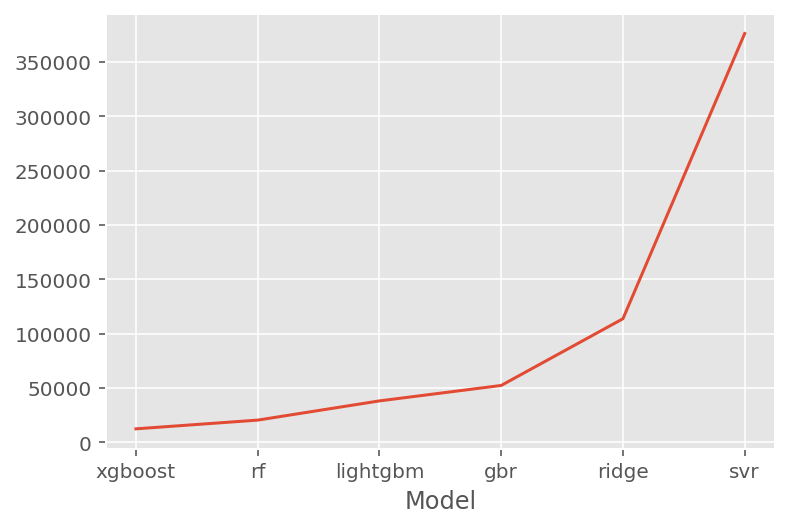

In [32]:
df_scores.set_index('Model')['RMSE'].plot.line('ro')

# Fit the models

In [33]:
%%time
ridge.fit(df_Xtrain,ser_ytrain);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.89066e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.48891e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.88429e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60558e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.27632e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

CPU times: user 6.54 s, sys: 3.62 s, total: 10.2 s
Wall time: 5.22 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.28452e-20): result may not be accurate.
  overwrite_a=True).T


Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('ridgecv',
                 RidgeCV(alphas=array([1.0e-15, 1.0e-10, 1.0e-08, 9.0e-04, 7.0e-04, 5.0e-04, 3.0e-04,
       1.0e-04, 1.0e-03, 5.0e-02, 1.0e-02, 1.0e-01, 3.0e-01, 1.0e+00,
       3.0e+00, 5.0e+00, 1.0e+01, 1.5e+01, 1.8e+01, 2.0e+01, 3.0e+01,
       5.0e+01, 7.5e+01, 1.0e+02]),
                         cv=KFold(n_splits=5, random_state=100, shuffle=True),
                         fit_intercept=True, gcv_mode=None, normalize=False,
                         scoring=None, store_cv_values=False))],
         verbose=False)

In [34]:
%%time
svr.fit(df_Xtrain,ser_ytrain);

CPU times: user 1min 5s, sys: 112 ms, total: 1min 5s
Wall time: 1min 5s


Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('svr',
                 SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.008,
                     gamma=0.0003, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [35]:
%%time
rf.fit(df_Xtrain,ser_ytrain);

CPU times: user 9min 37s, sys: 389 ms, total: 9min 37s
Wall time: 4min 53s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=-1, oob_score=True,
                      random_state=100, verbose=0, warm_start=False)

In [36]:
%%time
gbr.fit(df_Xtrain,ser_ytrain);

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


CPU times: user 1min 39s, sys: 162 ms, total: 1min 40s
Wall time: 1min 40s


GradientBoostingRegressor(alpha=0.5, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.030436296469075703,
                          loss='quantile', max_depth=None,
                          max_features=0.8340107985008011, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=245,
                          n_iter_no_change=None, presort='auto', random_state=3,
                          subsample=0.5131351702909814, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
%%time
xgboost.fit(df_Xtrain,ser_ytrain);

CPU times: user 1min 18s, sys: 85.3 ms, total: 1min 18s
Wall time: 39.5 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=100, reg_alpha=1, reg_lambda=5, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [38]:
%%time
lightgbm.fit(df_Xtrain,ser_ytrain);

CPU times: user 1.97 s, sys: 43.9 ms, total: 2.01 s
Wall time: 1.06 s


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=100, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [39]:
%%time
stack.fit(np.array(df_Xtrain),np.array(ser_ytrain));

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.89386e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.99424e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.26972e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.47562e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.53537e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

CPU times: user 1h 8min 27s, sys: 19.8 s, total: 1h 8min 47s
Wall time: 41min 19s


StackingCVRegressor(cv=5,
                    meta_regressor=XGBRegressor(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1, gamma=0,
                                                importance_type='gain',
                                                learning_rate=0.1,
                                                max_delta_step=0, max_depth=3,
                                                min_child_weight=1,
                                                missing=None, n_estimators=1200,
                                                n_jobs=-1, nthread=None,
                                                objective='reg:squarederror',
                                                random_state=100, reg_alpha=...
                                

In [40]:
%%time
y_preds_stack = stack.predict(np.array(df_Xtrain))

CPU times: user 57.6 s, sys: 193 ms, total: 57.8 s
Wall time: 55 s


In [0]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [42]:
rmse_stack = rmse(np.array(ser_ytrain), y_preds_stack)
rmse_stack

2179.751916650483

In [43]:
df_scores.loc[len(df_scores)] = ['stack',rmse_stack,0]
df_scores = df_scores.drop_duplicates()

df_scores

,Model,RMSE,rmse_std
0,xgboost,12472.660384,15897.311422
1,rf,20498.398459,21701.317863
2,lightgbm,38184.637408,18944.952525
3,gbr,52399.615964,30351.941714
4,ridge,113786.703957,9183.497711
5,svr,376295.885473,21587.107753
6,stack,2179.751917,0.000000


## Blend models and get predictions

In [44]:
df_scores.sort_values('RMSE').round(0)

,Model,RMSE,rmse_std
6,stack,2180.0,0.0
0,xgboost,12473.0,15897.0
1,rf,20498.0,21701.0
2,lightgbm,38185.0,18945.0
3,gbr,52400.0,30352.0
4,ridge,113787.0,9183.0
5,svr,376296.0,21587.0


In [45]:
x = df_scores.query("""
Model in ['rf', 'xgboost', 'lightgbm', 'gbr', 'ridge', 'svr','stack']
""")

x = x.sort_values('RMSE')
x

,Model,RMSE,rmse_std
0,xgboost,12472.660384,15897.311422
1,rf,20498.398459,21701.317863
2,lightgbm,38184.637408,18944.952525
3,gbr,52399.615964,30351.941714
4,ridge,113786.703957,9183.497711
5,svr,376295.885473,21587.107753


In [46]:
x['normalized'] = x['RMSE'].div(x['RMSE'].sum()).to_numpy()[::-1].round(2)
x

,Model,RMSE,rmse_std,normalized
0,xgboost,12472.660384,15897.311422,0.61
1,rf,20498.398459,21701.317863,0.19
2,lightgbm,38184.637408,18944.952525,0.09
3,gbr,52399.615964,30351.941714,0.06
4,ridge,113786.703957,9183.497711,0.03
5,svr,376295.885473,21587.107753,0.02


In [47]:
x['normalized'].sum()

1.0

In [0]:
def blended_predictions(X):
    return ( stack.predict(np.array(X)) * 0.57 + 
            rf.predict(X) * 0.17 +
            xgboost.predict(X) * 0.1 +
            lightgbm.predict(X) * 0.08 + 
            gbr.predict(X) * 0.04 +
            ridge.predict(X) * 0.03 +
            svr.predict(X) * 0.01
            )

In [0]:
rmse_blended = rmse(np.array(ser_ytrain), blended_predictions(df_Xtrain))

In [50]:
df_scores

,Model,RMSE,rmse_std
0,xgboost,12472.660384,15897.311422
1,rf,20498.398459,21701.317863
2,lightgbm,38184.637408,18944.952525
3,gbr,52399.615964,30351.941714
4,ridge,113786.703957,9183.497711
5,svr,376295.885473,21587.107753
6,stack,2179.751917,0.000000


In [51]:
df_scores.loc[len(df_scores)] = ['blended',rmse_blended,0]
df_scores = df_scores.drop_duplicates().sort_values('RMSE')

df_scores.style.format({'RMSE':"{:,.0f}"})

,Model,RMSE,rmse_std
6,stack,"2,180",0.000000
7,blended,"10,685",0.000000
0,xgboost,"12,473",15897.311422
1,rf,"20,498",21701.317863
2,lightgbm,"38,185",18944.952525
3,gbr,"52,400",30351.941714
4,ridge,"113,787",9183.497711
5,svr,"376,296",21587.107753


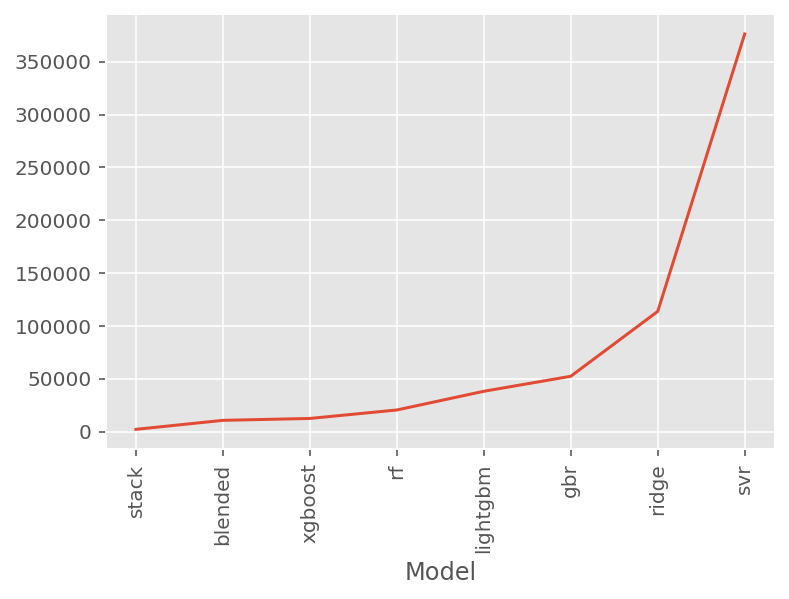

In [52]:
df_scores.set_index('Model')['RMSE'].plot.line('ro',rot=90)

In [0]:
def adjustedR2(rsquared,nrows,kcols):
    """
    Adjusted r-squared depends on number of rows and columns of Test data.

    It reduces the value of original r-squared value.
    """
    return rsquared- (kcols-1)/(nrows-kcols) * (1-rsquared)


In [58]:
import sklearn 

r2 = sklearn.metrics.r2_score(ytrain, y_preds_stack)
ar2 = adjustedR2(r2, df_Xtrain.shape[0], df_Xtrain.shape[1])
print(round(ar2,4))

1.0


# Model Predictions on Test Data

In [0]:
model_names = ['ridge','svr','rf','gbr','xgboost','lightgbm','stack']

In [0]:
ypreds_ridge = ridge.predict(df_Xtrain)
ypreds_svr = svr.predict(df_Xtrain)
ypreds_rf = rf.predict(df_Xtrain)
ypreds_gbr = gbr.predict(df_Xtrain)
ypreds_xgboost = xgboost.predict(df_Xtrain)
ypreds_lightgbm = lightgbm.predict(df_Xtrain)

ypreds_stack = stack.predict(np.array(df_Xtrain))

In [0]:
ypreds = [ypreds_ridge, ypreds_svr,ypreds_rf,ypreds_gbr,ypreds_xgboost,
          ypreds_lightgbm,ypreds_stack]

In [0]:
rmses = [rmse(np.array(ser_ytrain), yp) for yp in ypreds]

In [0]:
r2s = [sklearn.metrics.r2_score(ytrain, yp) for yp in ypreds]
ar2s = [adjustedR2(r2, df_Xtrain.shape[0], df_Xtrain.shape[1]) for r2 in r2s]

In [69]:
df_eval = pd.DataFrame({'Model': model_names,
                        'RMSE': rmses,
                        'R-squared': r2s,
                        'Adjusted-Rsquared': ar2s})


df_eval = df_eval.sort_values('RMSE',ascending=True)
df_eval

,Model,RMSE,R-squared,Adjusted-Rsquared
4,xgboost,1146.657634,0.999990,0.999990
6,stack,2179.751917,0.999965,0.999965
2,rf,22153.542982,0.996359,0.996337
5,lightgbm,33185.064959,0.991829,0.991782
3,gbr,54736.661071,0.977770,0.977640
0,ridge,109147.983931,0.911607,0.911093
1,svr,376704.377909,-0.052902,-0.059027


# Time Taken

In [70]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 1 hr 49 min 44 secs
